# DIABETES_DATA_VISUALIZE

This notebook mainly talks about the regression and its advantages

# 1 - IMPORTS FOR NOTEBOOK

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2 - LOAD DIABETES DATA

In [147]:
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()

In [148]:
diabetes_data.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [149]:
diabetes_data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

# 3 - CONVERT TO PANDAS DATAFRAME

### 3.2 - DATA OVERVIEW
<p>Attribute Information:</p>
<ol>
    <li><b>Age</b> </li>     
    <li><b>Sex</b> </li>     
    <li><b>Body mass index</b> </li>
    <li><b>Average blood pressure</b>  </li>
    <li><b>S1</b>       </li>
    <li><b>S2</b>       </li>
    <li><b>S3</b>       </li>
    <li><b>S4</b>       </li>
    <li><b>S5</b>       </li>
    <li><b>S6 is the Glucose level</b>       </li>
</ol>

In [150]:
#diabetes_data = pd.read_csv('diabetes_data.txt',names=['AGE','SEX','BMI','AVG-BP','S1','S2','S3','S4','S5','S6','Y'],skiprows=1, sep='\t')

In [151]:
diabetes_data.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [152]:
features = pd.DataFrame(diabetes_data.data,columns=['AGE','SEX','BMI','AVG-BP','S1','S2','S3','S4','S5','S6'])

In [153]:
diabetes_data

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [154]:
diabetes_data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [155]:
target = pd.DataFrame(diabetes_data.target,columns=['Y'])

In [156]:
target

,Y
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


# TEST AND TRAIN DATA

In [157]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.20, random_state=42)

# METRICS 

In [158]:
metrics_list = {}

In [159]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

def mertics_function(test_y, y_pred,r2,model_name,metrics_list,comments):
    metrics_list['model_name'] = model_name
    metrics_list['R2'] = r2
    metrics_list['explained_variance_score'] = explained_variance_score(test_y, y_pred)
    metrics_list['max_error'] = max_error(test_y, y_pred)
    metrics_list['mean_absolute_error'] = mean_absolute_error(test_y, y_pred)
    metrics_list['mean_squared_error'] = mean_squared_error(test_y, y_pred)
    metrics_list['median_absolute_error'] = median_absolute_error(test_y, y_pred)
    metrics_list['r2_score'] = r2_score(test_y, y_pred)
    metrics_list['change_comment']=comments

# LINEAR REGRESSION 

In [160]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x, train_y)
reg.fit(train_x, train_y)

y_pred = reg.predict(test_x)
# call the metrics function
mertics_function(test_y, y_pred,reg.score(train_x, train_y),"Linear Regression",metrics_list,"Basic without any modification")

# update the dataframe with the metrics 
metrics_pd = pd.DataFrame([metrics_list])

# RIDGE REGRESSION

In [161]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=.5)
ridge_reg.fit(train_x, train_y)
y_pred = ridge_reg.predict(test_x)

# call the metrics function
mertics_function(test_y, y_pred,ridge_reg.score(train_x, train_y),"Ridge Regression",metrics_list,"Basic Ridge regression without any modification")

# update the dataframe with the metrics 
metrics_pd = metrics_pd.append([metrics_list])

# LASSO REGRESSION

In [162]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(train_x, train_y)
y_pred = lasso_reg.predict(test_x)

# call the metrics function
mertics_function(test_y, y_pred,lasso_reg.score(train_x, train_y),"Laso Regression",metrics_list,"Basic Ridge regression without any modification")

# update the dataframe with the metrics 
metrics_pd = metrics_pd.append([metrics_list])

# ELASTIC NET REGRESSION

In [163]:
from sklearn.linear_model import ElasticNet
alpha = 0.1
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)
enet.fit(train_x, train_y)
y_pred = enet.predict(test_x)

# call the metrics function
mertics_function(test_y, y_pred,enet.score(train_x, train_y),"Elastic net Regression",metrics_list,"Basic Ridge regression without any modification")

# update the dataframe with the metrics 
metrics_pd = metrics_pd.append([metrics_list])

# SVM

In [164]:
from sklearn import svm
regr = svm.SVR()
regr.fit(train_x, train_y)
y_pred = regr.predict(test_x)
# call the metrics function
mertics_function(test_y, y_pred,reg.score(train_x, train_y),"SVM",metrics_list,"Basic without any modification")

# update the dataframe with the metrics 
metrics_pd = metrics_pd.append([metrics_list])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# DECISION TREE

In [165]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(train_x, train_y)
clf.predict(test_x)
# call the metrics function
mertics_function(test_y, y_pred,clf.score(train_x, train_y),"DECISION TREE",metrics_list,"Basic Ridge regression without any modification")

# update the dataframe with the metrics 
metrics_pd = metrics_pd.append([metrics_list])

In [166]:
metrics_pd

,model_name,R2,explained_variance_score,max_error,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score,change_comment
0,Linear Regression,0.527920,0.455496,154.495433,42.793893,2900.173288,37.990254,0.452607,Basic without any modification
0,Ridge Regression,0.487265,0.449650,129.502788,44.416020,2917.174211,40.529416,0.449398,Basic Ridge regression without any modification
0,Laso Regression,0.516942,0.473308,146.588914,42.854401,2798.190969,38.607645,0.471855,Basic Ridge regression without any modification
0,Elastic net Regression,0.150897,0.155855,153.340064,58.511578,4511.361048,56.977202,0.148503,Basic Ridge regression without any modification
0,SVM,0.527920,0.004889,167.972923,62.578778,5287.233906,57.864233,0.002061,Basic without any modification
0,DECISION TREE,1.000000,0.004889,167.972923,62.578778,5287.233906,57.864233,0.002061,Basic Ridge regression without any modification


In [167]:
test_y

,Y
287,219.0
211,70.0
72,202.0
321,230.0
73,111.0
...,...
255,153.0
90,98.0
57,37.0
391,63.0


In [168]:
test_y.reset_index(inplace = True)
test_y

,index,Y
0,287,219.0
1,211,70.0
2,72,202.0
3,321,230.0
4,73,111.0
...,...,...
84,255,153.0
85,90,98.0
86,57,37.0
87,391,63.0


In [169]:
del test_y['index']
test_y

,Y
0,219.0
1,70.0
2,202.0
3,230.0
4,111.0
...,...
84,153.0
85,98.0
86,37.0
87,63.0


In [170]:
pd_results = pd.DataFrame(y_pred,columns=['y_pred'])

In [171]:
pd_results['y_test'] = test_y

In [172]:
pd_results

,y_pred,y_test
0,142.109800,219.0
1,141.957497,70.0
2,142.057970,202.0
3,142.662692,230.0
4,141.970991,111.0
...,...,...
84,141.748215,153.0
85,141.571951,98.0
86,141.401174,37.0
87,141.452930,63.0


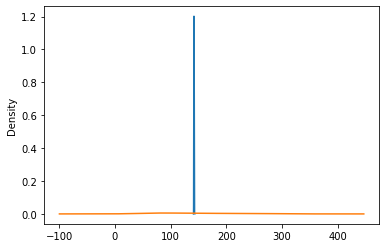

In [173]:
pd_results['y_pred'].plot.kde()
pd_results['y_test'].plot.kde()

# REGRESSION AFTER STANDARDIZATION

In [174]:
input_features

NameError: name 'input_features' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
input_features[['AGE']] = StandardScaler().fit_transform(input_features[['AGE']])

In [ ]:
input_features

In [ ]:
input_features[['SEX']] = StandardScaler().fit_transform(input_features[['SEX']])
input_features[['BMI']] = StandardScaler().fit_transform(input_features[['BMI']])
input_features[['AVG-BP']] = StandardScaler().fit_transform(input_features[['AVG-BP']])
input_features[['S1']] = StandardScaler().fit_transform(input_features[['S1']])
input_features[['S2']] = StandardScaler().fit_transform(input_features[['S2']])
input_features[['S3']] = StandardScaler().fit_transform(input_features[['S3']])
input_features[['S4']] = StandardScaler().fit_transform(input_features[['S4']])
input_features[['S5']] = StandardScaler().fit_transform(input_features[['S5']])

In [ ]:
input_features

In [ ]:
from sklearn.model_selection import train_test_split
t_x, tst_x, t_y, tst_y = train_test_split(input_features, glucose_levels, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(t_x, t_y)

In [ ]:
reg.score(t_x, t_y)

In [ ]:
y_pred = reg.predict(t_x)

In [ ]:
t_y.reset_index(inplace = True)
del t_y['index']
t_y

In [ ]:
pd_results = pd.DataFrame(y_pred,columns=['y_pred'])

In [ ]:
pd_results['y_test'] = t_y

In [ ]:
pd_results

In [ ]:
pd_results['y_pred'].plot.kde()
pd_results['y_test'].plot.kde()

# HEAT MAP ANALYSIS

In [ ]:
import seaborn as sns
sns.heatmap(input_features)

In [ ]:
sns.pairplot(input_features)

# PCA 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=8)

In [ ]:
new_data = pca.fit(input_features)

In [ ]:
new_data

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
print(pca.components_)